# Module 11 Challenge
## Deliverable 2: Scraped and analyzed Mars weather data

In [1]:
# Imported the relevant libraries for web scraping:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from selenium.webdriver.chrome.service import Service
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Used 'chromedriver' for automated browsing:
s = Service('/Applications/chromedriver_mac64/chromedriver')
browser = Browser('chrome', service=s)

### Step 1: Visited the website

Used automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspected the page with *Chrome DevTools* to identify which elements to scrape.

In [3]:
# Visited the Mars site with the data:
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)
html = browser.html

### Step 2: Scraped the table of the website

Created a Beautiful Soup object and used it to scrape the data in the HTML table.

In [4]:
# Created a 'Beautiful Soup' object:
mars_soup = soup(html, 'html.parser')

In [5]:
# Extracted all the rows of data:
mars_data = mars_soup.find_all('tr', class_='data-row')
mars_data

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Stored the data

Assembled the scraped data into a Pandas DataFrame. The columns have the following headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Created an empty list:
mars_data_l = []

# Looped through the scraped data to create a list of rows:
for rows in mars_data:
    elements = [e.text for e in rows.find_all('td')]
    mars_data_l.append(elements)

# Checked the results:
mars_data_l

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [7]:
# Created a Pandas DataFrame by using the list of rows and a list of the column names:
mars_data_df = pd.DataFrame(mars_data_l, columns=['id',
                                                  'terrestrial_date',
                                                  'sol',
                                                  'ls',
                                                  'month',
                                                  'min_temp',
                                                  'pressure'])

In [8]:
# Confirmed the DataFrame was successfully created:
mars_data_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepared the data for analysis

Examined the data types that were associated with each column. Casted the data to the appropriate `datetime`, `int`, or `float` data types.

In [9]:
# Examined the data type of each column:
mars_data_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Changed the data types for data analysis:
mars_data_df = mars_data_df.astype({'id': int,
                                   'terrestrial_date': 'datetime64',
                                   'sol': int,
                                   'ls': float,
                                   'month': int,
                                   'min_temp': float,
                                   'pressure': float})

In [11]:
# Confirmed the type changes were successful by examining the data types again:
mars_data_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyzed the data

Analyzed the dataset by using Pandas functions to answer the following questions:

1. **How many months exist on Mars?**
2. **How many Martian (and not Earth) days worth of data exist in the scraped dataset?**
3. **What are the coldest and the warmest months on Mars (at the location of Curiosity)?**
- Found the average of the minimum daily temperature for all of the months.
- Plotted the results as a bar chart.
4. **Which months have the lowest and the highest atmospheric pressure on Mars?**
- Found the average of the daily atmospheric pressure of all the months.
- Plotted the results as a bar chart.
5. **About how many terrestrial (Earth) days exist in a Martian year?**
- Considered how many days elapsed on Earth in the time that Mars circled the Sun once.
- Visually estimated the result by plotting the daily minimum temperature.

In [12]:
# 1. How many months are there on Mars?
mars_data_df['month'].nunique()

12

In [13]:
# 2. How many Martian days' worth of data are there?
mars_data_df['sol'].nunique()

1867

In [14]:
# 3. What is the average low temperature by month?
avg_low_temp_mars_by_month_s = mars_data_df.groupby('month').mean(numeric_only=True)['min_temp']
avg_low_temp_mars_by_month_s

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

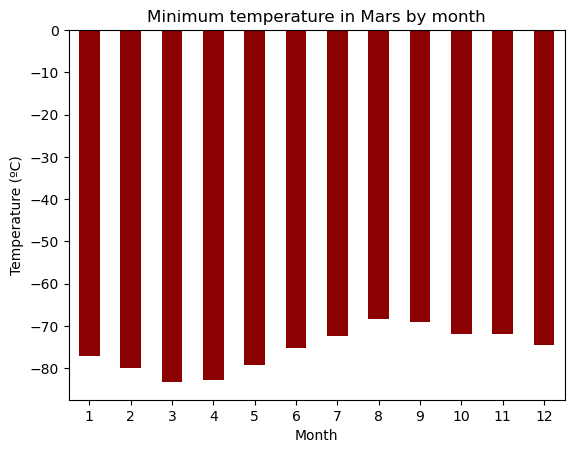

In [15]:
# 3. Plotted the average temperature by month:
avg_low_temp_mars_by_month_s.plot(kind='bar',
                                  title='Minimum temperature in Mars by month',
                                  xlabel='Month',
                                  ylabel='Temperature (ºC)',
                                  rot=0,
                                  facecolor='darkred')
plt.show()

In [16]:
# 3. Identified the coldest and warmest months in Curiosity's location:
coldest_month_num = avg_low_temp_mars_by_month_s.loc[avg_low_temp_mars_by_month_s == avg_low_temp_mars_by_month_s.min()].index[0]
coldest_month_temp = round(avg_low_temp_mars_by_month_s.min(), 2)
warmest_month_num = avg_low_temp_mars_by_month_s.loc[avg_low_temp_mars_by_month_s == avg_low_temp_mars_by_month_s.max()].index[0]
warmest_month_temp = round(avg_low_temp_mars_by_month_s.max(), 2)
print(f'The coldest month on Mars is month {coldest_month_num}. The temperature is approximately {coldest_month_temp}ºC.')
print(f'The warmest month on Mars is month {warmest_month_num}. The temperature is approximately {warmest_month_temp}ºC.')

The coldest month on Mars is month 3. The temperature is approximately -83.31ºC.
The warmest month on Mars is month 8. The temperature is approximately -68.38ºC.


In [17]:
# 4. Found the average of the daily atmospheric pressure of all the months:
avg_pressure_mars_by_month_s = mars_data_df.groupby('month').mean(numeric_only=True)['pressure']
avg_pressure_mars_by_month_s

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

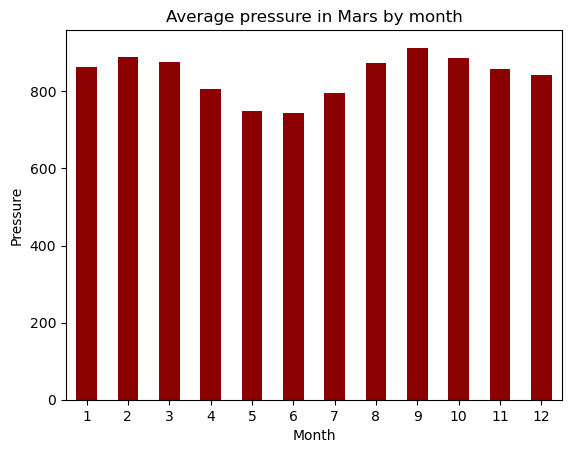

In [18]:
# 4. Plotted the average pressure by month:
avg_pressure_mars_by_month_s.plot(kind='bar',
                                  title='Average pressure in Mars by month',
                                  xlabel='Month',
                                  ylabel='Pressure',
                                  rot=0,
                                  facecolor='darkred')
plt.show()

In [19]:
# 4. Identified the months with the highest and lowest atmospheric pressure in Curiosity's location:
lowest_month_num = avg_pressure_mars_by_month_s.loc[avg_pressure_mars_by_month_s == avg_pressure_mars_by_month_s.min()].index[0]
lowest_pressure = round(avg_pressure_mars_by_month_s.min(), 2)
highest_month_num = avg_pressure_mars_by_month_s.loc[avg_pressure_mars_by_month_s == avg_pressure_mars_by_month_s.max()].index[0]
highest_pressure = round(avg_pressure_mars_by_month_s.max(), 2)
print(f'The month with the lowest atmospheric pressure on Mars is month {lowest_month_num}. The pressure is approximately {lowest_pressure}.')
print(f'The month with the highest atmospheric pressure on Mars is month {highest_month_num}. The pressure is approximately {highest_pressure}.')

The month with the lowest atmospheric pressure on Mars is month 6. The pressure is approximately 745.05.
The month with the highest atmospheric pressure on Mars is month 9. The pressure is approximately 913.31.


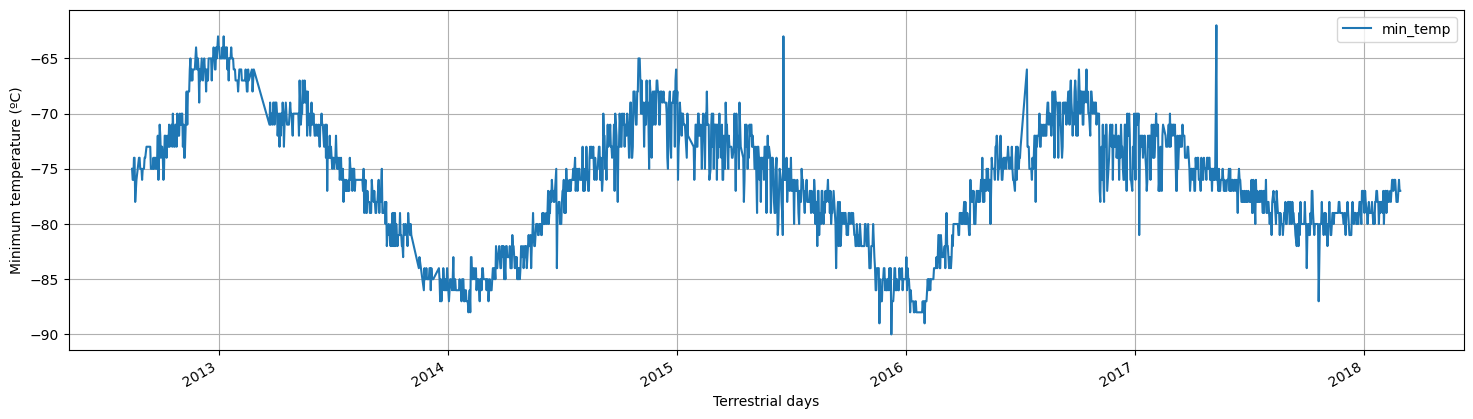

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
daily_temp_df = mars_data_df[['terrestrial_date', 'min_temp']]
daily_temp_df = daily_temp_df.set_index('terrestrial_date', drop=True)
daily_temp_df.plot(figsize=(18,5), grid=True, xlabel='Terrestrial days', ylabel='Minimum temperature (ºC)')
plt.show()

#### Answers:
1. **How many months exist on Mars?**
- There are 12 months on Mars.
2. **How many Martian (and not Earth) days worth of data exist in the scraped dataset?**
- There are 1867 sols worth of data.
3. **What are the coldest and the warmest months on Mars (at the location of Curiosity)?** 
- The coldest month in Mars is month 3. The temperature is approximately -83.31ºC.
- The warmest month in Mars is month 8. The temperature is approximately -68.38ºC. So, on average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!
4. **Which months have the lowest and the highest atmospheric pressure on Mars?**
- The month with the lowest atmospheric pressure on Mars is month 6. The pressure is approximately 745.05.
- The month with the highest atmospheric pressure on Mars is month 9. The pressure is approximately 913.31.
5. **About how many terrestrial (Earth) days exist in a Martian year?**
- Based on the plot, there seems to be almost two years between the coldest temperature trough just after the start of 2014 and the next trough almost at the end of 2016. Therefore, my ballpark is: there are approximately 670 Earth days on Mars ((365 days - 30 days) * 2). An Internet search confirmed that a Mars year is equivalent to 687 Earth days.

### Step 6: Saved the data

Exported the DataFrame to a CSV file.

In [21]:
# Wrote the data to a CSV file:
file_path = 'output_data/mars_data.csv'
mars_data_df.to_csv(file_path, index=False)

In [22]:
# Quit the automated browsing:
browser.quit()